In [53]:
import pandas as pd
import numpy as np
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch
import plotly.express as px
import json
import csv
import statsmodels.api as sm
from scipy import stats
from matplotlib import rc
from statsmodels.formula.api import ols
%matplotlib inline
import statsmodels.stats.outliers_influence as st_inf

In [34]:
df = pd.read_csv("NFL_fandom_data-surveymonkey.csv")
#df = df.drop( ['Tot. Respondents','GOP%','Total', 'Dem%', 'Ind%', 'White%', 'Nonwhite%'], axis = 1)
df

,Unnamed: 0,Unnamed: 1,Democrat,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Independent,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Team,Tot. Respondents,Asian,Black,Hispanic,Other,White,Total,Asian,Black,...,Black,Hispanic,Other,White,Total,GOP%,Dem%,Ind%,White%,Nonwhite%
1,Arizona Cardinals,148,2,7,7,3,20,39,4,5,...,1,5,2,30,38,26%,26%,48%,68%,32%
2,Atlanta Falcons,188,3,27,5,1,23,59,3,13,...,7,2,3,41,54,29%,31%,40%,57%,43%
3,Baltimore Ravens,150,5,14,3,4,30,56,3,7,...,1,1,1,26,29,19%,37%,43%,68%,32%
4,Buffalo Bills,92,2,3,1,1,15,22,7,1,...,3,4,NaN,16,24,26%,24%,50%,67%,33%
5,Carolina Panthers,164,4,16,3,2,26,51,3,4,...,NaN,1,1,44,49,30%,31%,39%,70%,30%
6,Chicago Bears,285,5,16,8,2,63,94,9,8,...,1,4,1,54,62,22%,33%,45%,76%,24%
7,Cincinnati Bengals,106,NaN,6,1,1,29,37,2,2,...,3,NaN,2,30,37,35%,35%,30%,81%,19%
8,Cleveland Browns,105,2,3,3,2,24,34,3,3,...,1,NaN,2,26,29,28%,32%,40%,81%,19%
9,Dallas Cowboys,438,5,30,17,10,66,128,9,17,...,1,7,6,123,140,32%,29%,39%,65%,35%


In [35]:
dff = pd.read_csv("NFL_fandom_data-surveymonkey.csv")


#removes top header
new_header = dff.iloc[0] 
dff = dff[1:]
dff.columns = new_header

#deletes unwanted columns
dff = dff.drop( ['Tot. Respondents','GOP%','Total', 'Dem%', 'Ind%', 'White%', 'Nonwhite%'], axis = 1)

#inserts columns based on party
dff.insert(1,'Party1', 'Democrat')
dff.insert(7,'Party2', 'Independent')
dff.insert(13,'Party3', 'Republican')
dff=dff.drop(dff.index[0:32])

dff

,Team,Party1,Asian,Black,Hispanic,Other,White,Party2,Asian,Black,Hispanic,Other,White,Party3,Asian,Black,Hispanic,Other,White
33,Grand Total,Democrat,115,363,183,113,1292,Independent,115,172,180,307,1907,Republican,41,44,91,61,1380


In [36]:
df = pd.read_csv("NFL_fandom_data-surveymonkey.csv")

#removes top header
df = df.drop(df.index[33])
new_header = df.iloc[0] 
df = df[1:]
df.columns = new_header

#deletes unwanted columns
df = df.drop( ['Tot. Respondents','GOP%','Total', 'Dem%', 'Ind%', 'White%', 'Nonwhite%'], axis = 1)

#inserts columns based on party
df.insert(1,'Party1', 'Democrat')
df.insert(7,'Party2', 'Independent')
df.insert(13,'Party3', 'Republican')
df 

,Team,Party1,Asian,Black,Hispanic,Other,White,Party2,Asian,Black,Hispanic,Other,White,Party3,Asian,Black,Hispanic,Other,White
1,Arizona Cardinals,Democrat,2,7,7,3,20,Independent,4,5,4,8,50,Republican,NaN,1,5,2,30
2,Atlanta Falcons,Democrat,3,27,5,1,23,Independent,3,13,8,8,43,Republican,1,7,2,3,41
3,Baltimore Ravens,Democrat,5,14,3,4,30,Independent,3,7,2,7,46,Republican,NaN,1,1,1,26
4,Buffalo Bills,Democrat,2,3,1,1,15,Independent,7,1,2,5,31,Republican,1,3,4,NaN,16
5,Carolina Panthers,Democrat,4,16,3,2,26,Independent,3,4,4,8,45,Republican,3,NaN,1,1,44
6,Chicago Bears,Democrat,5,16,8,2,63,Independent,9,8,6,6,100,Republican,2,1,4,1,54
7,Cincinnati Bengals,Democrat,NaN,6,1,1,29,Independent,2,2,NaN,1,27,Republican,2,3,NaN,2,30
8,Cleveland Browns,Democrat,2,3,3,2,24,Independent,3,3,NaN,1,35,Republican,NaN,1,NaN,2,26
9,Dallas Cowboys,Democrat,5,30,17,10,66,Independent,9,17,25,24,95,Republican,3,1,7,6,123
10,Denver Broncos,Democrat,4,15,7,6,68,Independent,3,4,7,18,90,Republican,NaN,1,3,3,84


In [37]:
t = pd.read_csv("NFL_fandom_data-surveymonkey.csv")

#removes top header
t = t.drop(t.index[33])
new_header = t.iloc[0] 
t = t[1:]
t.columns = new_header

#deletes unwanted columns
t = t.drop( ['Tot. Respondents','GOP%', 'Dem%', 'Ind%', 'White%', 'Nonwhite%'], axis = 1)

#inserts columns based on party
t.insert(1,'Party1', 'Democrat')
t.insert(8,'Party2', 'Independent')
t.insert(15,'Party3', 'Republican')
t 

,Team,Party1,Asian,Black,Hispanic,Other,White,Total,Party2,Asian,...,Other,White,Total,Party3,Asian,Black,Hispanic,Other,White,Total
1,Arizona Cardinals,Democrat,2,7,7,3,20,39,Independent,4,...,8,50,71,Republican,NaN,1,5,2,30,38
2,Atlanta Falcons,Democrat,3,27,5,1,23,59,Independent,3,...,8,43,75,Republican,1,7,2,3,41,54
3,Baltimore Ravens,Democrat,5,14,3,4,30,56,Independent,3,...,7,46,65,Republican,NaN,1,1,1,26,29
4,Buffalo Bills,Democrat,2,3,1,1,15,22,Independent,7,...,5,31,46,Republican,1,3,4,NaN,16,24
5,Carolina Panthers,Democrat,4,16,3,2,26,51,Independent,3,...,8,45,64,Republican,3,NaN,1,1,44,49
6,Chicago Bears,Democrat,5,16,8,2,63,94,Independent,9,...,6,100,129,Republican,2,1,4,1,54,62
7,Cincinnati Bengals,Democrat,NaN,6,1,1,29,37,Independent,2,...,1,27,32,Republican,2,3,NaN,2,30,37
8,Cleveland Browns,Democrat,2,3,3,2,24,34,Independent,3,...,1,35,42,Republican,NaN,1,NaN,2,26,29
9,Dallas Cowboys,Democrat,5,30,17,10,66,128,Independent,9,...,24,95,170,Republican,3,1,7,6,123,140
10,Denver Broncos,Democrat,4,15,7,6,68,100,Independent,3,...,18,90,122,Republican,NaN,1,3,3,84,91


In [38]:
dfa = pd.melt(df,id_vars = ['Team'], 
              value_vars = ['Asian', 'Black', 'Hispanic', 'Other', 'White'], var_name = 'Race', value_name = 'Count')
dfa = dfa.sort_values(by = ['Team','Race'])
#dfa = pd.melt(df,id_vars = ['Team'], 
 #             value_vars = ['Asian', 'Black', 'Hispanic', 'Other', 'White', 'Party1', 'Party2', 'Party3'], 
  #            var_name = 'Race', value_name = 'Count')
dfa = dfa.reset_index()
dfa = dfa.drop( 'index', axis = 1)
dfa

,Team,Race,Count
0,Arizona Cardinals,Asian,2
1,Arizona Cardinals,Asian,4
2,Arizona Cardinals,Asian,NaN
3,Arizona Cardinals,Black,7
4,Arizona Cardinals,Black,5
5,Arizona Cardinals,Black,1
6,Arizona Cardinals,Hispanic,7
7,Arizona Cardinals,Hispanic,4
8,Arizona Cardinals,Hispanic,5
9,Arizona Cardinals,Other,3


In [39]:
dfb = pd.melt(df, id_vars = ['Team'], 
             value_vars =['Party1','Party2','Party3'], var_name = 'party', value_name = 'Party')
dfb = dfb.sort_values(by = ['Team', 'Party'])
dfb = dfb.reset_index()
dfb = dfb.drop( 'index', axis = 1)
dfb = dfb.drop( 'Team', axis = 1)
dfb = dfb.drop( 'party', axis = 1)

dfc = pd.concat([dfa,dfb], axis = 1, join ='inner') 
#dfc.groupby('Race')['Team'].apply(' '.join).reset_index()
dfc

,Team,Race,Count,Party
0,Arizona Cardinals,Asian,2,Democrat
1,Arizona Cardinals,Asian,4,Independent
2,Arizona Cardinals,Asian,NaN,Republican
3,Arizona Cardinals,Black,7,Democrat
4,Arizona Cardinals,Black,5,Independent
5,Arizona Cardinals,Black,1,Republican
6,Arizona Cardinals,Hispanic,7,Democrat
7,Arizona Cardinals,Hispanic,4,Independent
8,Arizona Cardinals,Hispanic,5,Republican
9,Arizona Cardinals,Other,3,Democrat


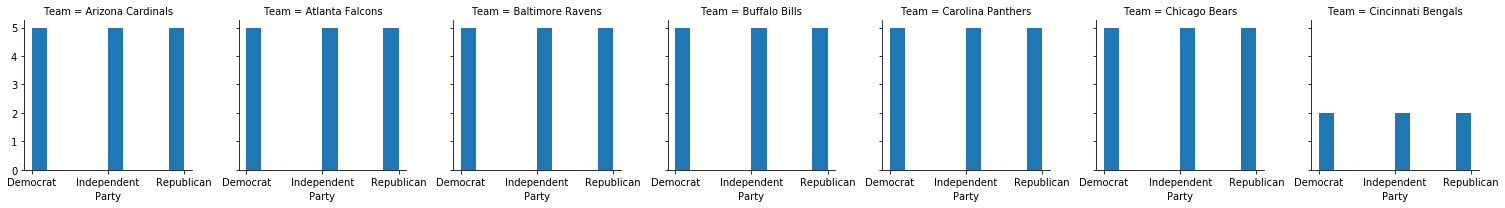

In [40]:
g = sns.FacetGrid(dfc, col="Team")
g.map(plt.hist, "Party")

In [41]:
df2 = pd.read_csv("2016 electoral votes.csv")

#removes unwanted columns and row
df2 = df2.drop( 'Votes', axis = 1)
df2 = df2.drop([0,1,3,6,7,10,11,14,16,18,19,23,25,26,27,28,29,30,31,34,36,37,
               39,40,41,44,45,46,49,51])

#sorts alphabetically based on state column
df2 = df2.sort_values(by=['State'])

#resets index and removes extra index columns
df2 = df2.reset_index()
df2 = df2.drop( 'index', axis = 1)
df2

,State,Winning Party
0,Arizona,Republicans
1,California,Democrats
2,Colorado,Democrats
3,District of Columbia,Democrats
4,Florida,Republicans
5,Georgia,Republicans
6,Illinois,Democrats
7,Indiana,Republicans
8,Kansas,Republicans
9,Lousiana,Republicans


In [42]:
df3 = pd.read_csv("hate_crimes.csv")

#removes unwanted columns and rows
df3 = df3.drop( ['share_population_in_metro_areas',
                 'share_population_with_high_school_degree', 'share_non_citizen',
                'share_white_poverty', 'gini_index','share_non_white',
                'hate_crimes_per_100k_splc'], axis = 1)
df3 = df3.drop([0,1,3,6,7,11,12,15,17,19,24,25,26,27,28,29,30,31,34,36,37,39,40,41,44,45,46,48,50])

#sorts alphabetically based  on state
df3 = df3.sort_values(by=['state'])

#resets index and removes extra index column
df3 = df3.reset_index()
df3 = df3.drop( 'index', axis = 1)

#brings df2 and 3 together by concatinating
df1 = pd.concat([df2,df3], axis = 1, join ='inner') 
df1 = df1.drop( ['state'], axis = 1)
df1

,State,Winning Party,median_household_income,share_unemployed_seasonal,share_voters_voted_trump,avg_hatecrimes_per_100k_fbi
0,Arizona,Republicans,49254,0.063,0.50,3.413928
1,California,Democrats,60487,0.059,0.33,2.397986
2,Colorado,Democrats,60940,0.040,0.44,2.804689
3,District of Columbia,Democrats,68277,0.067,0.04,10.953480
4,Florida,Republicans,46140,0.052,0.49,0.698070
5,Georgia,Republicans,49555,0.058,0.51,0.412012
6,Illinois,Democrats,54916,0.054,0.39,1.044016
7,Indiana,Republicans,48060,0.044,0.57,1.757357
8,Kansas,Republicans,53444,0.044,0.57,2.143987
9,Lousiana,Republicans,42406,0.060,0.58,1.341170


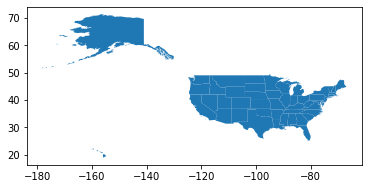

In [43]:
usa = gpd.read_file("states.shp")
usa.plot()

<BarContainer object of 22 artists>

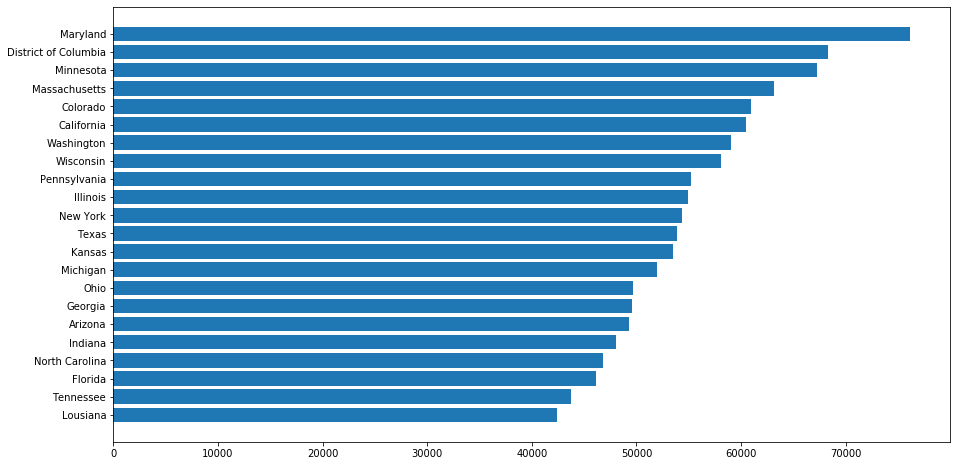

In [44]:
df1 = df1.sort_values(by=['median_household_income'], ascending = True)
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df1['State'], df1['median_household_income'])


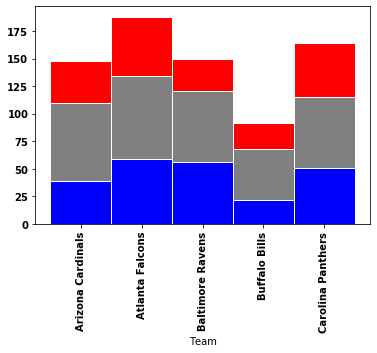

In [45]:
rc('font', weight='bold')
 

bars1 = [39,59,56,22,51]
bars2 = [71,75,65,46,64]
bars3 = [38,54,29,24,49]
 
bars = np.add(bars1, bars2).tolist()

r = [0,1,2,3,4]

names = ['Arizona Cardinals','Atlanta Falcons','Baltimore Ravens','Buffalo Bills','Carolina Panthers']
barWidth = 1
 
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color='grey', edgecolor='white', width=barWidth)
plt.bar(r, bars3, bottom=bars, color='red', edgecolor='white', width=barWidth)

plt.xticks(rotation=90)
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Team")
plt.show()

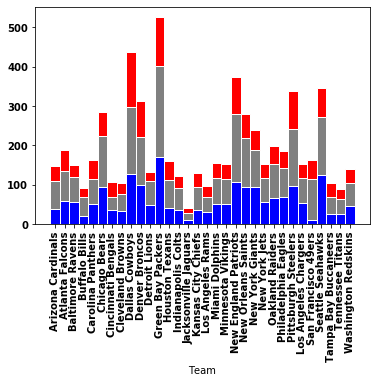

In [46]:
rc('font', weight='bold')
 

bars1 = [39,59,56,22,51,94,37,34,128,100,50,171,41,37,11,37,31,51,51,108,94,95,57,67,70,97,53,10,125,26,26,45]
bars2 = [71,75,65,46,64,129,32,42,170,122,59,230,70,54,18,57,39,66,63,171,125,94,60,86,73,146,64,105,146,43,37,59]
bars3 = [38,54,29,24,49,62,37,29,140,91,24,125,49,31,12,36,27,39,39,96,60,50,35,46,44,96,36,47,74,36,27,35]
 
bars = np.add(bars1, bars2).tolist()

r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

names = ['Arizona Cardinals','Atlanta Falcons','Baltimore Ravens','Buffalo Bills','Carolina Panthers','Chicago Bears',
         'Cincinnati Bengals','Cleveland Browns','Dallas Cowboys','Denver Broncos','Detroit Lions','Green Bay Packers',
         'Houston Texans','Indianapolis Colts','Jacksonville Jaguars','Kansas City Chiefs','Los Angeles Rams',
         'Miami Dolphins','Minnesota Vikings','New England Patriots','New Orleans Saints','New York Giants','New York Jets',
         'Oakland Raiders','Philadelphia Eagles','Pittsburgh Steelers','Los Angeles Chargers','San Francisco 49ers',
         'Seattle Seahawks','Tampa Bay Buccaneers','Tennessee Titans','Washington Redskins']
barWidth = 1
 
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color='grey', edgecolor='white', width=barWidth)
plt.bar(r, bars3, bottom=bars, color='red', edgecolor='white', width=barWidth)

plt.xticks(rotation=90)
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Team")
plt.show()

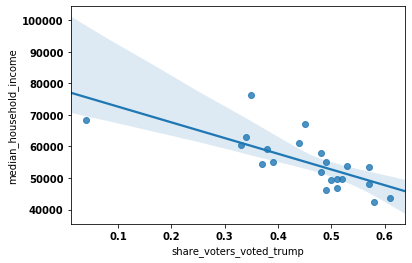

In [78]:
sns.regplot(x=df1["share_voters_voted_trump"], y=df1["median_household_income"])
#sns.plt.show()

In [80]:
graph1 = ols("median_household_income ~ share_voters_voted_trump", data=df1).fit()
print(graph1.summary())

                               OLS Regression Results                              
Dep. Variable:     median_household_income   R-squared:                       0.518
Model:                                 OLS   Adj. R-squared:                  0.494
Method:                      Least Squares   F-statistic:                     21.53
Date:                     Thu, 12 Dec 2019   Prob (F-statistic):           0.000158
Time:                             16:31:25   Log-Likelihood:                -221.71
No. Observations:                       22   AIC:                             447.4
Df Residuals:                           20   BIC:                             449.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [81]:
graph1 = ols("median_household_income ~ share_voters_voted_trump", data=df1).fit()
infl = graph1.get_influence()
sm = infl.summary_frame()
sm

,dfb_Intercept,dfb_share_voters_voted_trump,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
9,0.193233,-0.265907,0.065399,-1.099223,0.097677,-0.361661,-1.105298,-0.363660
18,0.141941,-0.183855,0.027435,-0.620101,0.124876,-0.234243,-0.610295,-0.230539
4,0.014369,-0.085393,0.037932,-1.198493,0.050166,-0.275432,-1.212498,-0.278651
15,0.043429,-0.098588,0.025414,-0.922980,0.056305,-0.225451,-0.919404,-0.224577
7,0.030472,-0.043132,0.001977,-0.200108,0.089874,-0.062882,-0.195237,-0.061352
0,0.017001,-0.051151,0.009594,-0.586001,0.052920,-0.138521,-0.576130,-0.136188
5,0.020867,-0.047370,0.006066,-0.450926,0.056305,-0.110145,-0.441759,-0.107906
16,0.022365,-0.043248,0.003969,-0.351665,0.060322,-0.089100,-0.343825,-0.087114
12,-0.001613,-0.014608,0.002076,-0.286847,0.048043,-0.064440,-0.280161,-0.062938
8,-0.113170,0.160187,0.026590,0.733846,0.089874,0.230606,0.725094,0.227855


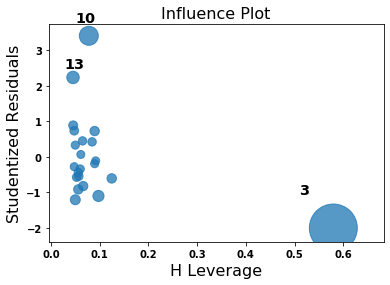

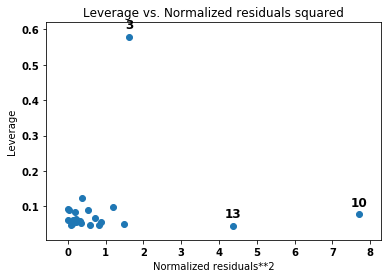

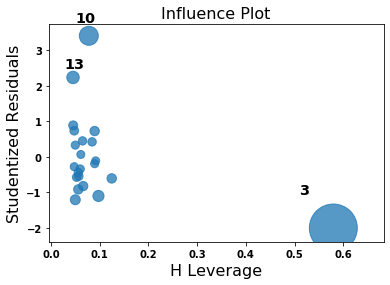

In [82]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(graph1)
influence_plot(graph1)

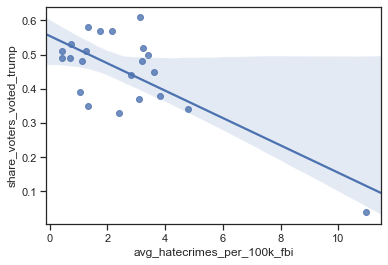

In [307]:
sns.regplot(x=df1["avg_hatecrimes_per_100k_fbi"], y=df1["share_voters_voted_trump"])

In [83]:
graph2 = ols("share_voters_voted_trump~ avg_hatecrimes_per_100k_fbi ", data=df1).fit()
print(graph2.summary())

                               OLS Regression Results                               
Dep. Variable:     share_voters_voted_trump   R-squared:                       0.536
Model:                                  OLS   Adj. R-squared:                  0.512
Method:                       Least Squares   F-statistic:                     23.06
Date:                      Thu, 12 Dec 2019   Prob (F-statistic):           0.000109
Time:                              16:47:55   Log-Likelihood:                 23.862
No. Observations:                        22   AIC:                            -43.72
Df Residuals:                            20   BIC:                            -41.54
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [75]:
graph2 = ols("avg_hatecrimes_per_100k_fbi ~ share_voters_voted_trump", data=df1).fit()
infl = graph2.get_influence()
sm = infl.summary_frame()
sm

,dfb_Intercept,dfb_share_voters_voted_trump,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
9,-0.055450,0.076305,0.005702,0.324559,0.097677,0.106785,0.317177,0.104356
18,-0.453055,0.586836,0.237543,1.824657,0.124876,0.689265,1.947969,0.735847
4,0.010508,-0.062451,0.020989,-0.891519,0.050166,-0.204885,-0.886743,-0.203787
15,0.016106,-0.036562,0.003629,-0.348761,0.056305,-0.085190,-0.340969,-0.083286
7,-0.078324,0.110864,0.012917,0.511489,0.089874,0.160732,0.501831,0.157697
0,-0.028628,0.086131,0.026371,0.971551,0.052920,0.229658,0.970120,0.229320
5,0.042608,-0.096725,0.024502,-0.906264,0.056305,-0.221368,-0.902033,-0.220334
16,-0.067617,0.130755,0.034544,1.037415,0.060322,0.262846,1.039502,0.263375
12,0.003716,0.033645,0.010822,0.654894,0.048043,0.147121,0.645268,0.144959
8,-0.118833,0.168203,0.029236,0.769506,0.089874,0.241812,0.761377,0.239257


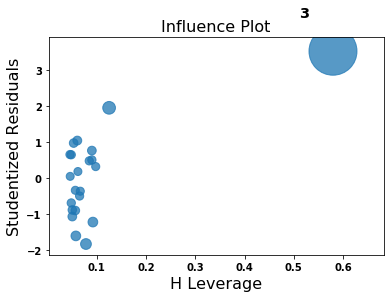

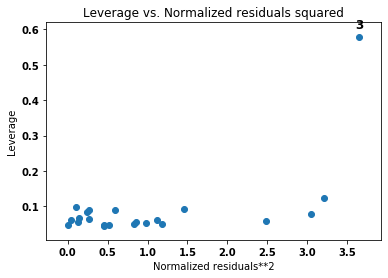

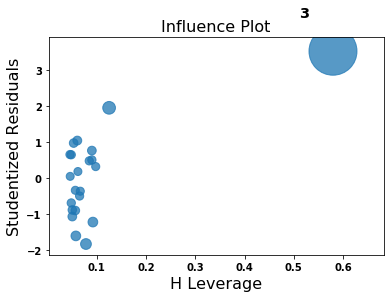

In [76]:
plot_leverage_resid2(graph2)
influence_plot(graph2)

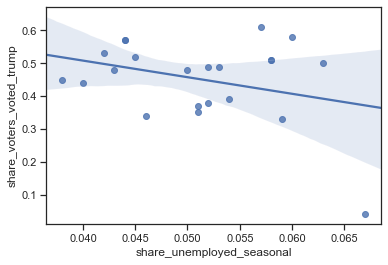

In [310]:
sns.regplot(x=df1["share_unemployed_seasonal"], y=df1["share_voters_voted_trump"])
#sns.plt.show()

In [477]:
graph3 = ols("share_unemployed_seasonal ~ share_voters_voted_trump", data=df1).fit()
print(graph3.summary())

                                OLS Regression Results                               
Dep. Variable:     share_unemployed_seasonal   R-squared:                       0.104
Model:                                   OLS   Adj. R-squared:                  0.059
Method:                        Least Squares   F-statistic:                     2.323
Date:                       Wed, 11 Dec 2019   Prob (F-statistic):              0.143
Time:                               18:57:06   Log-Likelihood:                 77.196
No. Observations:                         22   AIC:                            -150.4
Df Residuals:                             20   BIC:                            -148.2
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [73]:
graph3 = ols("share_unemployed_seasonal ~ share_voters_voted_trump", data=df1).fit()
infl = graph3.get_influence()
sm = infl.summary_frame()
sm

,dfb_Intercept,dfb_share_voters_voted_trump,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
9,-0.288325,0.396763,0.135562,1.582586,0.097677,0.520695,1.649232,0.542623
18,-0.300672,0.389457,0.115370,1.271615,0.124876,0.480354,1.292779,0.488348
4,-0.002448,0.014550,0.001184,0.211733,0.050166,0.048659,0.206603,0.047481
15,-0.051307,0.116472,0.034883,1.081334,0.056305,0.264131,1.086184,0.265316
7,0.101619,-0.143837,0.021551,-0.660666,0.089874,-0.207610,-0.651082,-0.204598
0,-0.053886,0.162126,0.083424,1.728001,0.052920,0.408470,1.826071,0.431652
5,-0.051307,0.116472,0.034883,1.081334,0.056305,0.264131,1.086184,0.265316
16,0.041917,-0.081058,0.013730,-0.654045,0.060322,-0.165713,-0.644413,-0.163273
12,-0.000484,-0.004378,0.000187,-0.086132,0.048043,-0.019350,-0.083967,-0.018863
8,0.101619,-0.143837,0.021551,-0.660666,0.089874,-0.207610,-0.651082,-0.204598


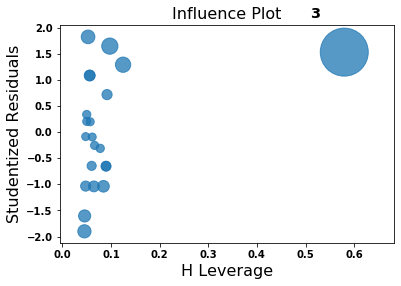

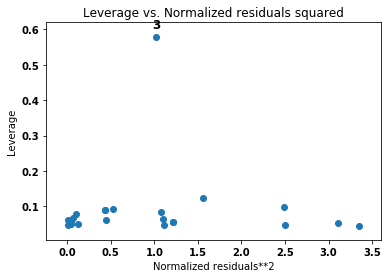

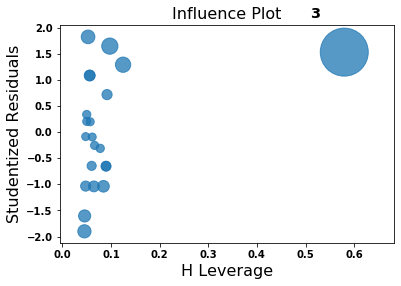

In [74]:
plot_leverage_resid2(graph3)
influence_plot(graph3)